In [77]:
# import libraries
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image

In [78]:
# read csv data
df = pd.read_csv("beebom_data.csv")

**Below 6 code cells are responsible for data manipulation**



In [79]:
remove_columns = ['Unnamed: 0', 'channel_id']
df = df.drop(remove_columns, axis=1)

In [80]:
df['published_at'] = df['published_at'].astype('string')
df['published_at'] = df['published_at'].str.replace("2023","")
df['published_at'] = df['published_at'].str.replace(",","",regex=True)

In [81]:
df['published_month'] = df['published_at'].str.split().str[0]
conditions = [
    df['published_month'] == 'April',
    df['published_month'] == 'May',
    df['published_month'] == 'June'
]
choices = ['Apr', 'May', 'Jun']

df['published_month'] = np.select(conditions, choices, default='Unknown')

In [82]:
df['published_date'] = df['published_month'].str.cat(df['published_at'].str.split().str[1], sep='-')

In [83]:
remove_columns = ['published_at']
df = df.drop(remove_columns, axis=1)

In [98]:
# Prepare data for View count trend plot
df['Month'] = df['published_date'].str.split('-', expand=True)[0]
df['Date'] = df['published_date'].str.split('-', expand=True)[1]
df['Month'] = pd.Categorical(df['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                                                                 'Nov', 'Dec'], ordered=True)
df = df.sort_values(['Month','Date'])

**Below chart represents View count trend from April to June 2023**
- X axis reprent the release date and Y axis represent number of views
- Number of Likes for that data point is displayed on the top of each bar
- The hover data includes Published date, View count,Likes and Title of the video



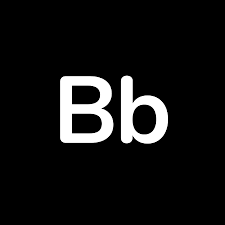

In [99]:
# Plot horizontal bar chart
fig = px.bar(df, x="published_date", y="view_count",text="like_count",color_discrete_sequence=[px.colors.qualitative.Dark24[23]],hover_data={'like_count': True,'title':True})
fig.update_traces(textposition='auto')
fig.update_traces(textangle=0)
fig.update_layout(bargap=0.1)
fig.update_layout(title = {'text':'<b>View Count Trend: April to June 2023</b>','font':{'size':30,'family':'Arial'}},title_x=0.5, xaxis_title="<b>Published Date</b>", yaxis_title="<b>Number of Views</b>")
fig.update_traces(hovertemplate='Published Date: %{x}<br>View Count: %{y}<br>Likes: %{customdata[0]}<br>Title: %{customdata[1]}')
fig.update_layout(template="plotly_white")

# Add logo to plot
img = Image.open("image.png")
fig.add_layout_image(
    dict(
        source=img,
        xref="paper",
        yref="paper",
        x=1,
        y=1.15,
        sizex=0.2,
        sizey=0.2,
        xanchor="right",
        yanchor="top",
        opacity=1,
        layer="above"
    )
)

# Display the final plot
fig.show()

**Below chart reperesents Video Metrics**
- The chart represents a interactive horizontal bar chart displaying the video metrics in a descending order from top to bottom.
- The chart includes interactive buttons that allows us to dynamically change the data being displayed .
- The three buttons that present are:
1.   Most Viewed Video
2.   Most Liked Video
3.   Most Commented Video






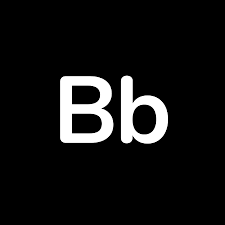

In [100]:
# sort the dataframe according to required column
df_view = df.sort_values(by='view_count')
df_like = df.sort_values(by='like_count')
df_comment = df.sort_values(by='comment_count')


# Define color scale for plot
color_scale =  px.colors.sequential.Plasma[::-1]


# Plot horizontal bar chart
fig = px.bar(df_view, x="view_count", y="title",orientation='h',color='view_count',
    color_continuous_scale=color_scale)
fig.update_layout(title = {'text':'<b>Video Metrics</b>','font':{'size':30,'family':'Arial'}},title_x=0.5, xaxis_title="<b>View Count</b>", yaxis_title="<b>Video</b>")
fig.update_traces(hovertemplate='Count: %{x}<br>Title: %{y}')
fig.update_layout(template="plotly_white")
buttons = [
    dict(
        label='Most Viwed',
        method='update',
        args=[{'x': [df_view['view_count']], 'y': [df_view['title']]},
               {'xaxis': {'title': '<b>View Count</b>'}}]
    ),
    dict(
        label='Most Liked',
        method='update',
        args=[{'x': [df_like['like_count']], 'y': [df_like['title']]},
              {'xaxis': {'title': '<b>Like Count</b>'}}]

    ),
     dict(
        label='Most Commented',
        method='update',
        args=[{'x': [df_comment['comment_count']], 'y': [df_comment['title']]},
              {'xaxis': {'title': '<b>Comment Count</b>'}}]
        )

]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=buttons,
            direction='left',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=-0.5,
            xanchor='left',
            y=1.2,
            yanchor='top'
        )
    ],
    xaxis={'title': '<b>View Count</b>'}
)
fig.update(layout_coloraxis_showscale=False)

# Add logo to plot
img = Image.open("image.png")
fig.add_layout_image(
    dict(
        source=img,
        xref="paper",
        yref="paper",
        x=0.95,
        y=1.25,
        sizex=0.2,
        sizey=0.2,
        xanchor="right",
        yanchor="top",
        opacity=1,
        layer="above"
    )
)

# Display the final plot
fig.show()